<a href="https://colab.research.google.com/github/pbeens/Sunshine-List-CSV/blob/main/Sunshine_List_Stub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Jupyter Notebook stub intended to be shared for others to experiment with Ontario's Sunshine list data.

This notebook just shows one thing that can done with it. Feel free to copy it and play with the data yourself. 

Created using Python, Pandas, and Matplotlib.

In [1]:
!git clone 'https://github.com/pbeens/Sunshine-List-CSV'

fatal: destination path 'Sunshine-List-CSV' already exists and is not an empty directory.


In [2]:
# This function will return the data path for a given year
# Run this cell before using the function elsewhere

import os

def get_path(year):
  path = os.path.join('Sunshine-List-CSV', f'{year}.csv')
  return path

# example of how to use
print(get_path(1996))

Sunshine-List-CSV/1996.csv


In [3]:
# Let's read in a datafile

year = 1996

with open(get_path(1996), 'r') as f:
  data = f.readlines()

for line in data[:5]: # first five line
  print(line)

Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year

OTHER PUBLIC SECTOR EMPLOYERS,Kendall,Perry,194890.40,711.24,Addiction Research Foundation,President & CEO,1996

OTHER PUBLIC SECTOR EMPLOYERS,Rehm,Juergen,115603.62,403.41,Addiction Research Foundation,"Dir., Soc. Eval. Research & Act. Dir., Clin. Research",1996

OTHER PUBLIC SECTOR EMPLOYERS,Room,Robin,149434.48,512.58,Addiction Research Foundation,"V.P., Research & Coordinator, Intern. Programs",1996

ONTARIO PUBLIC SERVICE,KNOX,KEN W,109382.92,4921.68,"Agriculture,Food and Rural Affairs",Deputy Minister,1996



In [4]:
import pandas as pd

csv_file = get_path(1996)

df = pd.read_csv(csv_file)

# Let's confirm the first few rows
print('First few rows...')
print(df.head())

# and the columns...
print('The columns are...')
print(df.columns)

First few rows...
                          Sector  ... Calendar Year
0  OTHER PUBLIC SECTOR EMPLOYERS  ...          1996
1  OTHER PUBLIC SECTOR EMPLOYERS  ...          1996
2  OTHER PUBLIC SECTOR EMPLOYERS  ...          1996
3         ONTARIO PUBLIC SERVICE  ...          1996
4                      HOSPITALS  ...          1996

[5 rows x 8 columns]
The columns are...
Index(['Sector', 'Last Name', 'First Name', 'Salary Paid', 'Taxable Benefits',
       'Employer', 'Job Title', 'Calendar Year'],
      dtype='object')


In [5]:
# Want the salary data?

print(df['Salary Paid'])

0       194890.40
1       115603.62
2       149434.48
3       109382.92
4       110309.00
          ...    
4496    114917.00
4497    102744.67
4498    121289.04
4499    105519.00
4500    129037.92
Name: Salary Paid, Length: 4501, dtype: float64


In [6]:
# Want the average salary data?

avg_salary = df['Salary Paid'].mean()
print(avg_salary)

121495.17802932656


In [7]:
# Let's use f-string to print the salary nicely!

print(f'${avg_salary:,.2f}')

$121,495.18


In [8]:
# What are all the sectors? (using 2020 data)

import pandas as pd

csv_file = get_path(2020)
df = pd.read_csv(csv_file)

sectors = sorted(list(set(df['Sector'])))

print('The sectors are...')
for sector in sectors:
  print(sector)

The sectors are...
Colleges
Crown Agencies
Government of Ontario — Judiciary
Government of Ontario — Legislative Assembly and Offices
Government of Ontario — Ministries
Hospitals & Boards of Public Health
Municipalities & Services
Ontario Power Generation
Other Public Sector Employers
School Boards
Seconded (Attorney General)*
Seconded (Children, Community and Social Services)*
Seconded (Colleges and Universities)*
Seconded (Education)*
Seconded (Health)*
Seconded (Municipal Affairs and Housing)*
Seconded (Solicitor General)*
Universities


In [9]:
# Let's just get school board data

df_schools = df[(df['Sector'] == 'School Boards')]
df_schools.head(2)

,Sector,Last name,First name,Salary paid,Taxable benefits,Employer,Job title,Calendar year
139645,School Boards,Aalbers,Wilma,106659.95,82.18,Upper Grand District School Board,Secondary Librarian,2020
139646,School Boards,Aaron,Ian,101791.44,82.46,Toronto Catholic District School Board,Teacher — Elementary,2020


In [10]:
# School board average salary

avg_salary = df_schools['Salary paid'].mean()
print(f'${avg_salary:,.2f}')

$109,083.82


In [11]:
# What about the averages of each sector?

def avg_salary(sector):
  df_temp = df[(df['Sector'] == sector)]
  return df_temp['Salary paid'].mean()

for sector in sectors:
  avg_sal = avg_salary(sector)
  print(f'{sector}: ${avg_sal:,.2f}')

Colleges: $119,183.90
Crown Agencies: $131,764.83
Government of Ontario — Judiciary: $234,174.77
Government of Ontario — Legislative Assembly and Offices: $138,737.85
Government of Ontario — Ministries: $128,670.59
Hospitals & Boards of Public Health: $120,083.35
Municipalities & Services: $123,291.46
Ontario Power Generation: $152,705.55
Other Public Sector Employers: $132,148.99
School Boards: $109,083.82
Seconded (Attorney General)*: $128,732.67
Seconded (Children, Community and Social Services)*: $119,933.23
Seconded (Colleges and Universities)*: $224,825.46
Seconded (Education)*: $115,888.45
Seconded (Health)*: $180,109.31
Seconded (Municipal Affairs and Housing)*: $123,157.13
Seconded (Solicitor General)*: $127,763.62
Universities: $156,238.11


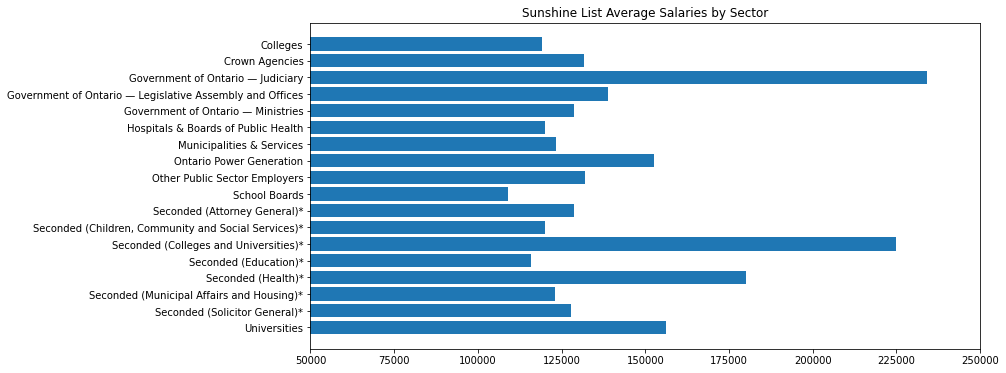

In [12]:
# plotting the results

import matplotlib.pyplot as plt

sorted_sectors = []
avg_salaries = []

for sector in sorted(sectors, reverse=True):
  sorted_sectors.append(sector)
  avg_salaries.append(avg_salary(sector))


plt.figure(figsize=(12,6))
plt.title('Sunshine List Average Salaries by Sector')
plt.barh(sorted_sectors, avg_salaries)
plt.xlim([50E3,250E3])
plt.savefig('Sunshine List Avg Salaries by Sector.png', bbox_inches='tight')
plt.show()


